# Foundations of AI & ML
## Session 08
### Experiment 3 Part 3

### K-fold cross-validation

In this form of cross-validation the data set is divided into k subsets. Each time, one of the k subsets is used as the test set and the other k-1 subsets are put together to form a training set. Then the average error across all k trials is computed. 

In this experiment we are going to apply k-fold cross-validation method on the MNIST datasets and then tune the hyper parameters of MLPClassifier.

In [5]:
## Importing required packages
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

### Generating the dataset

In [6]:
## Loading MNIST dataset from sklearn
digits = datasets.load_digits(n_class=10)
## Loding the data and storing in x
X = digits.data
## Loading the target data and storing it in y
y = digits.target

In [7]:
### hyper parameters
# activation
a = ["identity","logistic","tanh","relu"]
#solvers
s = ["lbfgs","sgd","adam"]
#learning rate
lr = [0.0001,0.001,0.01,0.1]
#hidden layers
h = [(5,2),(3,2),(6,3),(7,2)]

In [8]:
## Applying K-Folds cross-validator
kf = KFold(n_splits=4)

In [9]:
#function to Create MLP classifier object with hyper parameters
def mlp(a,s,h,lr):
    clf = MLPClassifier(activation= a ,solver= s ,hidden_layer_sizes = h,max_iter = 5000 ,learning_rate = 'constant',learning_rate_init=lr)
    return clf  
#function to calculate the accuracy
def accuracy(actual,predicted):
    return np.count_nonzero(actual == predicted)*1.0/len(actual)

** Exercise 1** Predict the values using test data and calculate the accuracy

In [7]:
for train_index, test_index in kf.split(X):
    print(train_index, test_index)

[ 450  451  452 ... 1794 1795 1796] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 23

In [10]:
def kf_accuracy(kf):
    test_accuracy = []
    train_accuracy = []
    for i in range(10):
        k1 = np.random.randint(0,len(a))
        k2 = np.random.randint(0,len(s))
        k3 = np.random.randint(0,len(lr))
        k4 = np.random.randint(0,len(h))
        print("\nHyper-parameters = \n activation = ", a[k1],    "\n solver = ", s[k2], "\n learning_rate_init = ", lr[k3],         "\n hidden_layer_sizes = ", h[k4])
        # calling the mlp function with random hyper paramters
        clf = mlp(a[k1],s[k2],h[k4],lr[k3])
        tempTrain = 0
        tempTest = 0
        #In this experiment we are going to apply leave one out method on the MNIST datasets then we tune the hyper parameters of MulitiLayer perceptron classifier.
        for train_index, test_index in kf.split(X):
            ## Splitting the data into train and test
            X_train, X_test = X[train_index], X[test_index]
            Y_train, Y_test  = y[train_index], y[test_index]
            ##fit the data into the model
            clf.fit(X_train,Y_train)
            ##predicting the values on the fitted model using train data
            predTrain = clf.predict((X_train))
            #adding the accuracy
            tempTrain = tempTrain + accuracy(Y_train,predTrain)
            ##predict the values on the fitted model using test data
            predTest = clf.predict((X_test))
            #adding the accuracy
            tempTest = tempTest + accuracy(Y_test, predTest)
        ##Calculating the train accuracy
        train_accuracy.append(tempTrain*1.0/4)
        ##Calculating the test accuracy
        test_accuracy.append(tempTest*1.0/4)
        print("(train,test) accuracy = ",tempTrain*1.0/4, tempTest*1.0/4)
    return train_accuracy, test_accuracy
        

In [12]:
train_accuracy, test_accuracy = kf_accuracy(kf)


Hyper-parameters = 
 activation =  logistic 
 solver =  adam 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (5, 2)
(train,test) accuracy =  0.6045421301099927 0.5052684978965603


In [11]:
##Plotting the data
def plot(train_accuracy, test_accuracy):
    xx = np.array(range(1,11))
    plt.bar(xx-0.2,train_accuracy,width=0.2)
    plt.bar(xx, test_accuracy,width=0.2)
    plt.legend(["Train","Test"])
    plt.show()


Hyper-parameters = 
 activation =  logistic 
 solver =  lbfgs 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (5, 2)
(train,test) accuracy =  0.4817412141278894 0.44236327641672857

Hyper-parameters = 
 activation =  tanh 
 solver =  lbfgs 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (7, 2)
(train,test) accuracy =  0.7135741255983734 0.6244221727295225

Hyper-parameters = 
 activation =  logistic 
 solver =  sgd 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (6, 3)
(train,test) accuracy =  0.48432815312189526 0.4284892353377877

Hyper-parameters = 
 activation =  logistic 
 solver =  lbfgs 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (6, 3)
(train,test) accuracy =  0.6987809760782837 0.5936946300420687

Hyper-parameters = 
 activation =  identity 
 solver =  sgd 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (5, 2)
(train,test) accuracy =  0.6477431439025949 0.5653674832962138

Hyper-parameters = 
 activation =  logistic 
 solver =  lbfgs 
 learning

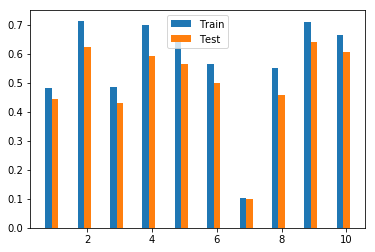

In [12]:
plot(*kf_accuracy(kf))

**Exercise 2 ** Vary the number of k-fold splits and observe the changes


Hyper-parameters = 
 activation =  tanh 
 solver =  lbfgs 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (5, 2)
(train,test) accuracy =  0.9444919669182428 0.8526225946617008

Hyper-parameters = 
 activation =  identity 
 solver =  sgd 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (7, 2)
(train,test) accuracy =  1.6363736695936943 1.5052917442582248

Hyper-parameters = 
 activation =  logistic 
 solver =  sgd 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (6, 3)
(train,test) accuracy =  1.6295486842899876 1.4692659838609563

Hyper-parameters = 
 activation =  relu 
 solver =  sgd 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (5, 2)
(train,test) accuracy =  0.5998708675514255 0.5749068901303539

Hyper-parameters = 
 activation =  relu 
 solver =  sgd 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (3, 2)
(train,test) accuracy =  0.26649587242470874 0.24345903165735566

Hyper-parameters = 
 activation =  relu 
 solver =  lbfgs 
 learning_rate_init =  0

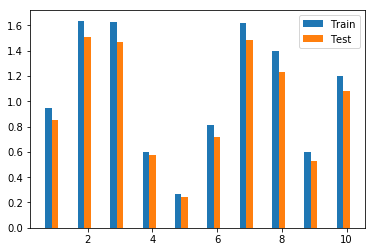

In [13]:
kf = KFold(n_splits=10)
plot(*kf_accuracy(kf))

**Solutions**

**Exercise 1 **

In [ ]:
predTest = clf.predict((X_test))
tempTest = tempTest + accuracy(Y_test,predTest)

**Exercise 2**

In [ ]:
kf = KFold(n_splits=5)